In [64]:
!pip install seaborn
!pip install plotly

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [65]:
# TensorFlow と tf.keras のインポート
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# ヘルパーライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
plt.style.use('fivethirtyeight')

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)

import os

In [66]:
all_data = pd.read_csv('./all_year.csv')
all_data.isna().sum()
all_data

,Unnamed: 0,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low
0,0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,NaN,NaN,NaN,NaN
1,1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,NaN,NaN,NaN,NaN
2,2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,NaN,NaN,NaN,NaN
3,3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,NaN,NaN,NaN,NaN
4,4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,151,Rwanda,NaN,152,3.334,NaN,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,NaN,NaN,NaN,NaN,NaN
778,152,Tanzania,NaN,153,3.231,NaN,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,NaN,NaN,NaN,NaN,NaN
779,153,Afghanistan,NaN,154,3.203,NaN,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,NaN,NaN,NaN,NaN,NaN
780,154,Central African Republic,NaN,155,3.083,NaN,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,NaN,NaN,NaN,NaN,NaN


In [67]:
explanatory_variable = ['Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom']
data = pd.DataFrame(all_data, columns = explanatory_variable)
data
data.to_csv('dataset.csv', index=False)

In [68]:
# 相関関係 ヒートマップで描画

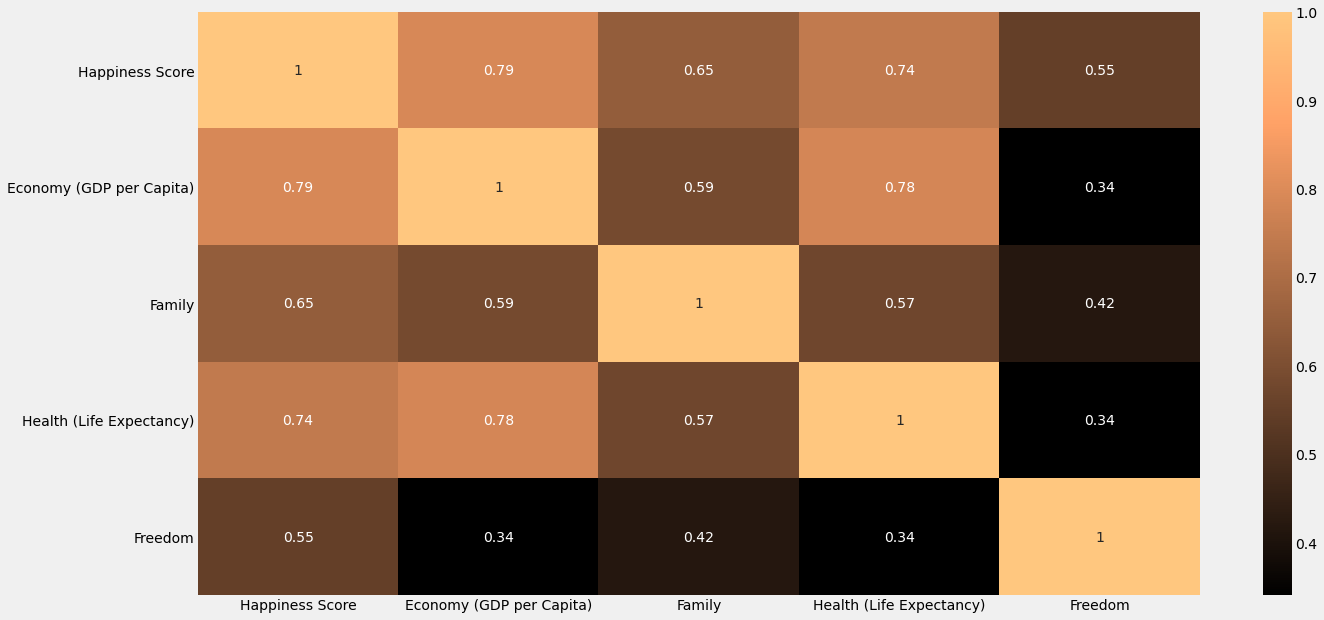

In [69]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.heatmap(data.corr(), cmap = 'copper', annot = True)

plt.show()

In [70]:
# 幸福度スコアについて、経済、健康、家族とは高い正の相関がある。次点で自由も正の相関がある。
# 政府への信頼や寛大さ、ディストピア残差とは相関が無い。

In [71]:
data.notnull().all()

Happiness Score             True
Economy (GDP per Capita)    True
Family                      True
Health (Life Expectancy)    True
Freedom                     True
dtype: bool

In [72]:
train_dataset = data.sample(frac=0.8,random_state=0)
test_dataset = data.drop(train_dataset.index)
test_dataset.to_csv('test_dataset.csv', index=False)
train_dataset

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom
382,5.525,1.101803,1.357564,0.520169,0.465733
487,6.886,1.398000,1.471000,0.819000,0.547000
351,6.344,1.530624,1.286678,0.590148,0.449751
14,7.119,1.394510,1.247110,0.861790,0.546040
145,3.781,0.285200,1.002680,0.382150,0.328780
...,...,...,...,...,...
25,6.750,1.327920,1.299370,0.891860,0.614770
110,4.681,0.799070,1.202780,0.673900,0.251230
149,3.656,0.174170,0.464750,0.240090,0.377250
152,3.575,0.319820,0.302850,0.303350,0.234140


In [73]:
train_stats = train_dataset.describe()
train_stats.pop("Happiness Score")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Economy (GDP per Capita),626.0,0.930539,0.409811,0.0,0.612492,1.001410,1.263000,2.096
Family,626.0,1.088803,0.334456,0.0,0.878988,1.136927,1.356204,1.644
Health (Life Expectancy),626.0,0.620778,0.246028,0.0,0.451144,0.653114,0.812233,1.122
Freedom,626.0,0.416605,0.149103,0.0,0.317532,0.435965,0.534010,0.724


In [74]:
# 目的変数を外出し
import csv

with open('target_variables.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['Happiness Score'])

In [75]:
train_labels = train_dataset.pop('Happiness Score')
test_labels = test_dataset.pop('Happiness Score')

In [76]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

normed_train_data

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom
382,0.417910,0.803577,-0.408933,0.329493
487,1.140674,1.142742,0.805688,0.874533
351,1.464296,0.591631,-0.124497,0.222301
14,1.132158,0.473326,0.979611,0.868094
145,-1.574724,-0.257503,-0.969922,-0.589024
...,...,...,...,...
25,0.969669,0.629580,1.101833,1.329052
110,-0.320804,0.340783,0.215918,-1.109136
149,-1.845653,-1.865876,-1.547336,-0.263946
152,-1.490246,-2.349946,-1.290211,-1.223755


In [77]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [78]:
model = build_model()

In [79]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


In [80]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.2447383 ],
       [ 0.16636652],
       [ 0.24117303],
       [-0.07742913],
       [ 0.04559737],
       [ 0.0011382 ],
       [ 0.09606186],
       [-0.08934014],
       [-0.10741417],
       [-0.00085828]], dtype=float32)

In [81]:
# エポックが終わるごとにドットを一つ出力することで進捗を表示
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

In [82]:
# モデルを1000エポック訓練し、訓練と検証の正解率をhistoryオブジェクトに記録

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])

model.save('./model_1.h5')

# 実行したhistoryオブジェクトに保存された数値を使ってモデルの訓練を可視化する
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,0.110226,0.253779,0.110226,0.528418,0.576416,0.528418,995
996,0.112953,0.259768,0.112953,0.434166,0.517602,0.434166,996
997,0.110806,0.265043,0.110806,0.383591,0.507354,0.383591,997
998,0.103809,0.249041,0.103809,0.441530,0.522323,0.441530,998
999,0.110867,0.260538,0.110867,0.491908,0.560930,0.491908,999


In [83]:
# MAEとMSEの計算
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} Happiness Score".format(mae))

5/5 - 0s - loss: 0.4084 - mae: 0.4956 - mse: 0.4084
Testing set Mean Abs Error:  0.50 Happiness Score


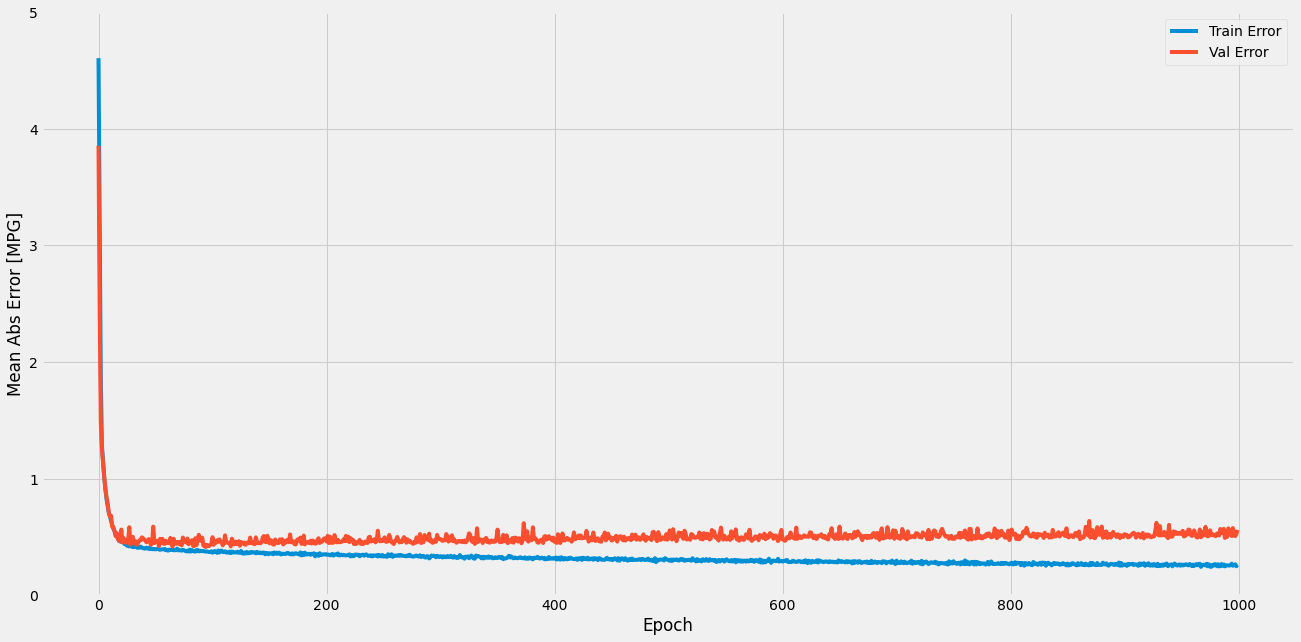

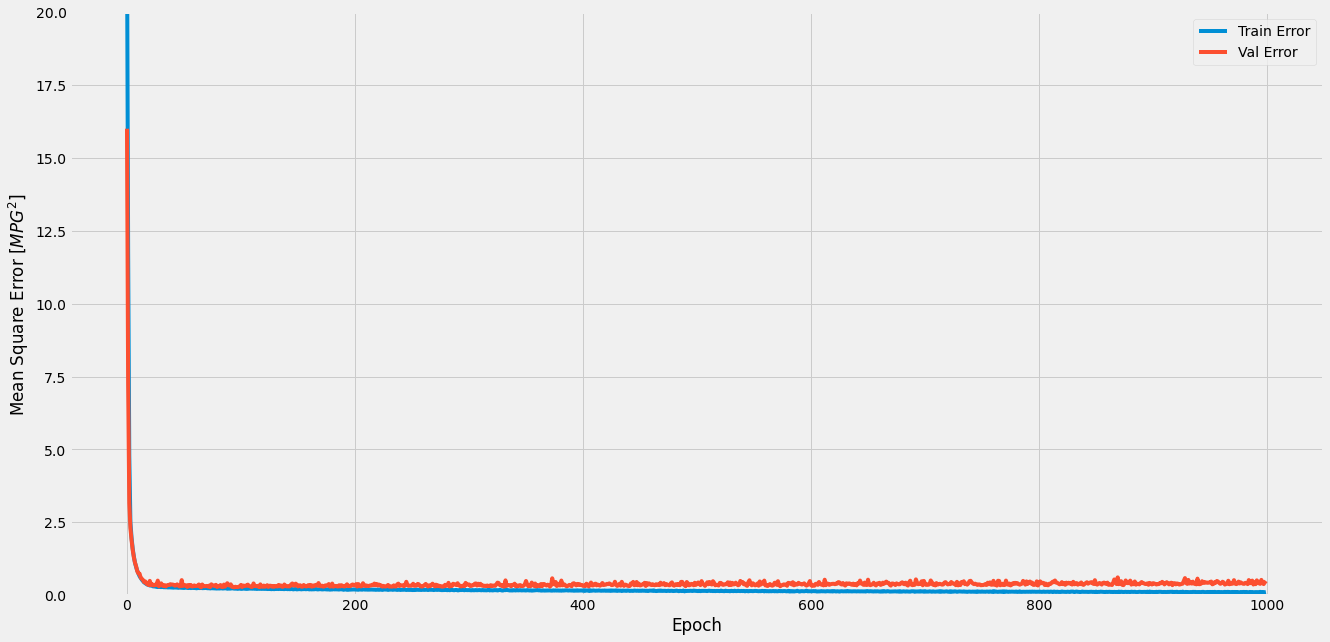

In [84]:
# 学習効率をグラフ化
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)


...........................................................

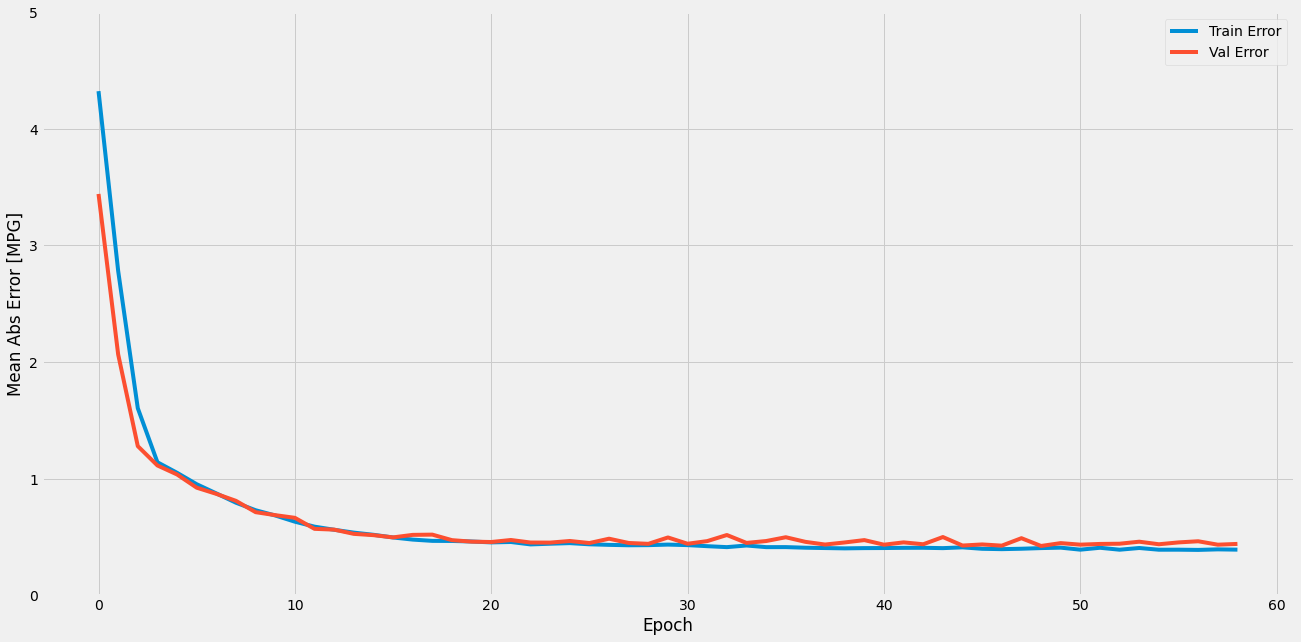

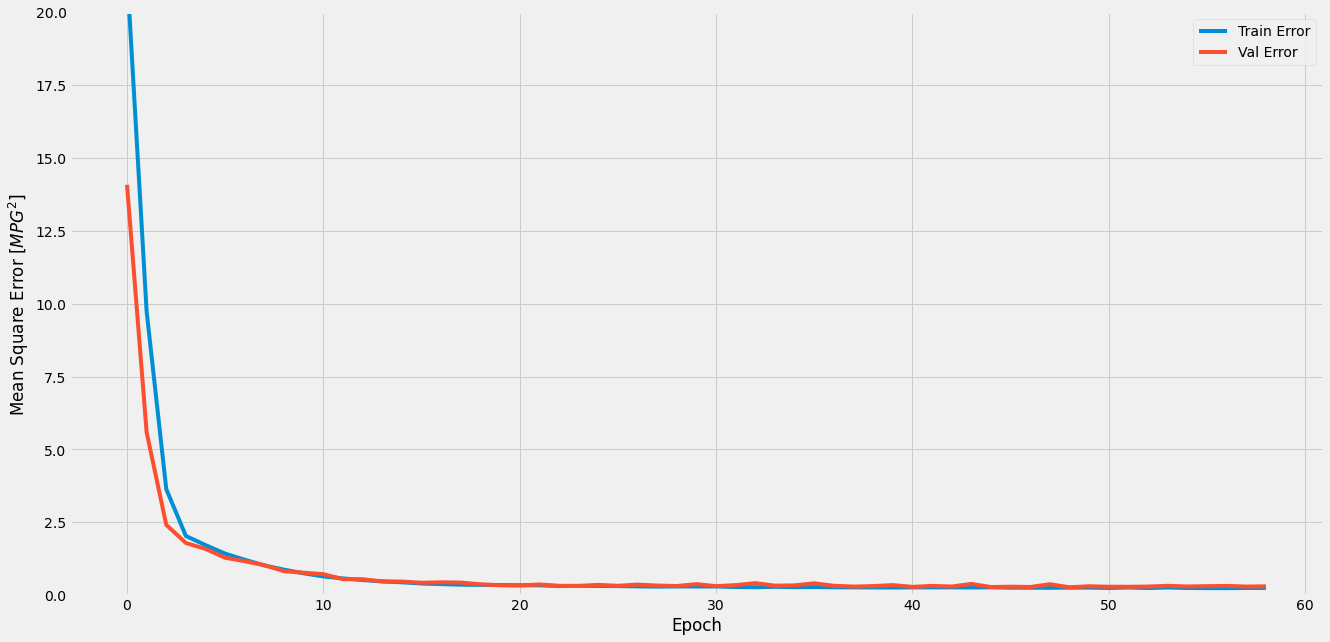

In [85]:
model = build_model()

# patience は改善が見られるかを監視するエポック数を表すパラメーター
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)
model.save('./model_2.h5')

In [86]:
# モデルを使った予測（学習用データ）
pred = model.predict(normed_train_data).flatten()
pred

array([5.5447392, 6.972078 , 6.174253 , 6.918425 , 4.2726135, 5.3703094,
       4.3233385, 5.108608 , 6.6506896, 5.3483787, 6.605485 , 5.4851375,
       3.8366725, 5.5560493, 3.419866 , 5.8871927, 4.382865 , 4.9486117,
       5.8359656, 5.470062 , 6.837749 , 4.2276263, 5.1024995, 6.8594947,
       7.3149757, 7.3179765, 6.227184 , 7.4433956, 4.1750445, 6.9388747,
       7.3078074, 6.506743 , 5.657682 , 3.788977 , 7.0460157, 5.0660286,
       3.2719398, 5.6704464, 6.1073995, 6.132286 , 4.575834 , 6.5482526,
       6.1944647, 5.28738  , 7.407043 , 7.215675 , 6.017709 , 4.9874988,
       6.8498297, 4.4411077, 4.2467146, 4.282767 , 7.214127 , 7.119312 ,
       4.3393574, 4.554337 , 4.436221 , 4.562259 , 4.4885135, 5.6406   ,
       7.338478 , 3.742533 , 7.428878 , 6.8195186, 6.7204614, 5.216804 ,
       5.5570025, 3.9818895, 3.6842804, 5.9131866, 6.083512 , 6.681533 ,
       6.3912215, 6.199335 , 6.783549 , 5.1122103, 4.3421254, 4.3468137,
       6.1475444, 4.110412 , 7.5470757, 5.5294685, 

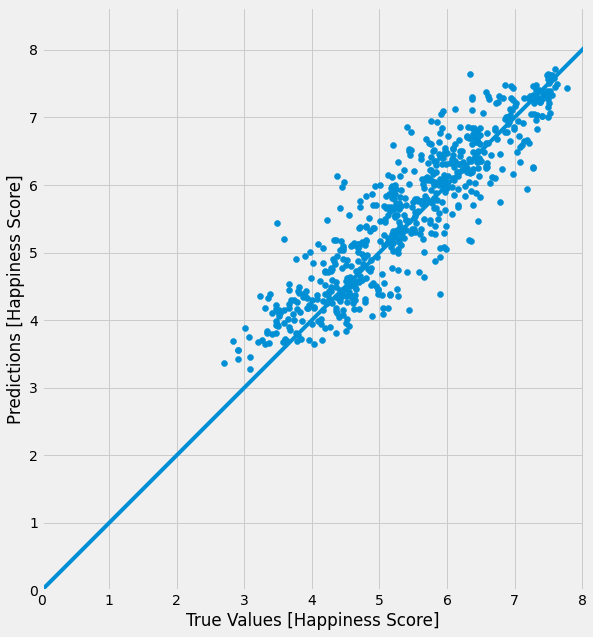

In [87]:
# モデルを使った予測（学習用データ）
test_predictions = model.predict(normed_train_data).flatten()

plt.scatter(train_labels, test_predictions)
plt.xlabel('True Values [Happiness Score]')
plt.ylabel('Predictions [Happiness Score]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

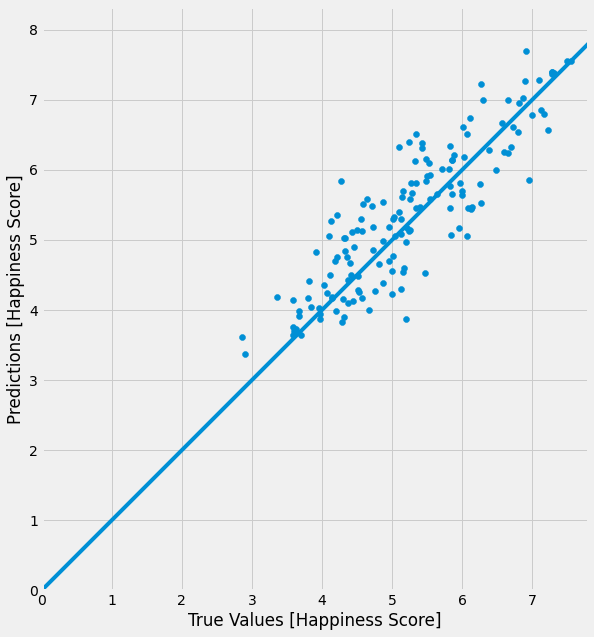

In [88]:
# モデルを使った予測（検証用データ）
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Happiness Score]')
plt.ylabel('Predictions [Happiness Score]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [89]:
#実際の値
with tf.name_scope('data'):
    Y = tf.Variable(train_labels, name='Y')
    print(Y)

<tf.Variable 'data/Y:0' shape=(626,) dtype=float64, numpy=
array([5.5250001 , 6.886     , 6.34399986, 7.119     , 3.781     ,
       4.69199991, 4.39      , 5.061     , 6.929     , 5.488     ,
       6.485     , 5.389     , 3.334     , 5.125     , 2.905     ,
       5.835     , 4.19000006, 4.37599993, 4.8       , 5.42999983,
       6.375     , 3.975     , 4.7       , 6.199     , 6.611     ,
       7.228     , 5.762     , 7.6       , 3.65700006, 6.923     ,
       6.374     , 5.43      , 5.833     , 3.41      , 7.246     ,
       4.456     , 3.083     , 5.124     , 6.08400011, 6.168     ,
       4.507     , 5.96400023, 6.174     , 5.332     , 7.328     ,
       7.286     , 5.648     , 5.279     , 5.92000008, 3.655     ,
       4.219     , 4.161     , 6.726     , 6.927     , 4.424     ,
       5.07399988, 4.252     , 4.631     , 4.635     , 5.212     ,
       7.561     , 3.069     , 6.977     , 6.711     , 6.021     ,
       5.129     , 5.23699999, 3.462     , 3.632     , 5.185     ,
   

In [90]:
#決定係数(R2)
with tf.name_scope('r2'):
    r2 = 1 - (tf.reduce_sum(tf.square(Y - pred)) / tf.reduce_sum(tf.square(Y - tf.reduce_mean(Y))))
    tf.summary.scalar('r2', r2)
    tf.print(r2)

0.79204892124375681


In [91]:
# MAEとMSEの計算
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {}".format(mae))

5/5 - 0s - loss: 0.2869 - mae: 0.4290 - mse: 0.2869
Testing set Mean Abs Error: 0.4290427565574646


In [92]:
# RMSEの計算
rmse = tf.sqrt(tf.reduce_mean((Y - pred)**2))
print("RMSE: {}".format(rmse))

RMSE: 0.5194016497189944
